# **Prediction of Earthquake Events using Time Series**

## **Description**:-
* This project aims to analyze and forecast earthquake activity in a specific region using **USGS Earthquake Data**.
The workflow involves:

* Collecting historical earthquake data (counts & magnitudes).
Preprocessing the data into a **monthly time series**.

* Applying **ARIMA models** to forecast:

  * The **number of earthquakes** expected in future months.
  * The **average magnitude** of earthquakes over the same period.
  * Visualizing trends and predictions to understand earthquake activity patterns.

This model is intended for research and educational purposes only, not for real-world disaster prediction.


#**Key Features**:


**Data Source** – Live earthquake data fetched from the USGS API.

**Dual Forecasting** – Provides predictions for both:

* Earthquake counts per month*

* Average earthquake magnitudes per month

**ARIMA Time-Series Modeling** – Captures trends and seasonality.

**Visualization** – Graphs showing:

* Historical earthquake patterns

* Forecasted future trends (next 12 months)

**Custom Region & Time Filtering** – User can specify:

Geographic bounds (latitude/longitude)

Time range (historical and future forecast window)


### `import` Packages

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

##Fetch Data

In [ ]:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2010-01-01",   # Historical start
    "endtime": "2023-12-31",     # End date
    "minlatitude": 30,           # Example area (modify)
    "maxlatitude": 46,
    "minlongitude": 129,
    "maxlongitude": 146,
    "minmagnitude": 3.0
}

response = requests.get(url, params=params)
data = response.json()

## Extraction

In [ ]:
records = []
for feature in data["features"]:
    props = feature["properties"]
    time = pd.to_datetime(props["time"], unit="ms")
    mag = props["mag"]
    records.append([time, mag])

df = pd.DataFrame(records, columns=["time", "magnitude"])
df.set_index("time", inplace=True)

### Monthly data

In [ ]:
monthly_counts = df.resample("M").size()              # Count of quakes
monthly_magnitudes = df.resample("M")["magnitude"].mean()  # Avg magnitude

##Forecasting

In [ ]:
count_model = ARIMA(monthly_counts, order=(2,1,2))
count_fit = count_model.fit()
count_forecast = count_fit.get_forecast(steps=12)
count_pred = count_forecast.predicted_mean
count_ci = count_forecast.conf_int()

mag_model = ARIMA(monthly_magnitudes.fillna(method="bfill"), order=(2,1,2))
mag_fit = mag_model.fit()
mag_forecast = mag_fit.get_forecast(steps=12)
mag_pred = mag_forecast.predicted_mean
mag_ci = mag_forecast.conf_int()

###Plot Forecast

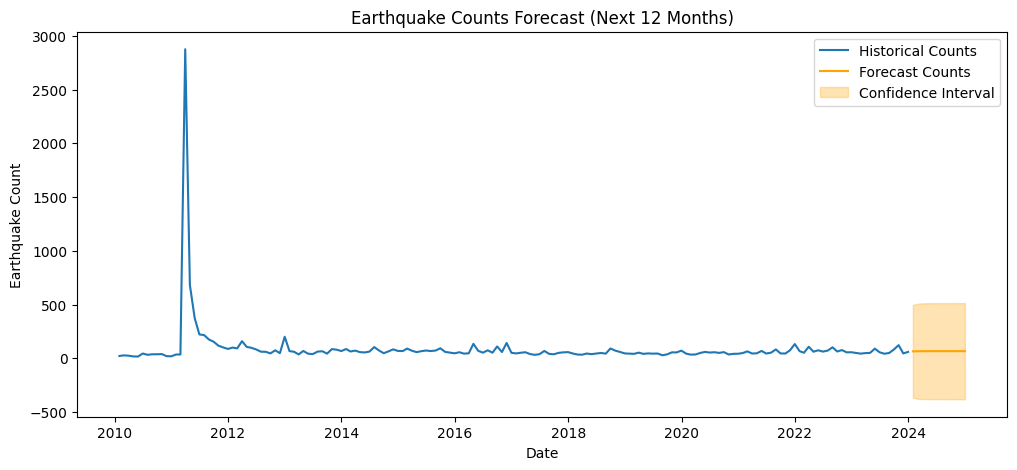

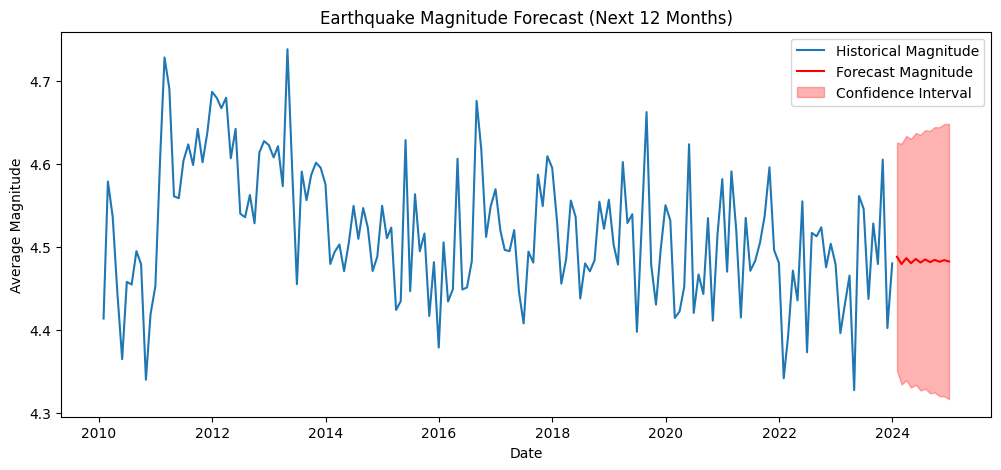

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(monthly_counts.index, monthly_counts, label="Historical Counts")
plt.plot(count_pred.index, count_pred, label="Forecast Counts", color="orange")
plt.fill_between(count_ci.index,
                 count_ci.iloc[:,0], count_ci.iloc[:,1],
                 color="orange", alpha=0.3, label="Confidence Interval")
plt.title("Earthquake Counts Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Earthquake Count")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly_magnitudes.index, monthly_magnitudes, label="Historical Magnitude")
plt.plot(mag_pred.index, mag_pred, label="Forecast Magnitude", color="red")
plt.fill_between(mag_ci.index,
                 mag_ci.iloc[:,0], mag_ci.iloc[:,1],
                 color="red", alpha=0.3, label="Confidence Interval")
plt.title("Earthquake Magnitude Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Average Magnitude")
plt.legend()
plt.show()

###Forecasted Values

In [ ]:
print("Forecasted Earthquake Counts (Next 12 Months):")
print(count_pred)

print("\nForecasted Average Magnitude (Next 12 Months):")
print(mag_pred)

Forecasted Earthquake Counts (Next 12 Months):
2024-01-31    65.162018
2024-02-29    66.319123
2024-03-31    66.835927
2024-04-30    67.048995
2024-05-31    67.137454
2024-06-30    67.174156
2024-07-31    67.189385
2024-08-31    67.195704
2024-09-30    67.198326
2024-10-31    67.199414
2024-11-30    67.199865
2024-12-31    67.200052
Freq: ME, Name: predicted_mean, dtype: float64

Forecasted Average Magnitude (Next 12 Months):
2024-01-31    4.487939
2024-02-29    4.479143
2024-03-31    4.486323
2024-04-30    4.480165
2024-05-31    4.485400
2024-06-30    4.480943
2024-07-31    4.484736
2024-08-31    4.481508
2024-09-30    4.484256
2024-10-31    4.481917
2024-11-30    4.483908
2024-12-31    4.482213
Freq: ME, Name: predicted_mean, dtype: float64


##Conclusion

The **forecasted earthquake counts** give an estimate of how frequently earthquakes may occur in the upcoming year.

The **forecasted magnitudes** provide insights into the expected severity levels of those earthquakes.

The predictions **appear smoothed (linear-like)** because ARIMA captures long-term trends rather than random seismic fluctuations. For more realistic variability, advanced models like **SARIMA, Prophet, or LSTM** (deep learning) could be explored.

This model highlights **general seismic patterns**, making it useful for **research, trend analysis, and awareness,** but it should **not be relied upon for real-time earthquake warnings or emergency planning.**

### **************End******